In [2]:
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath
from options import *
from constants import *

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

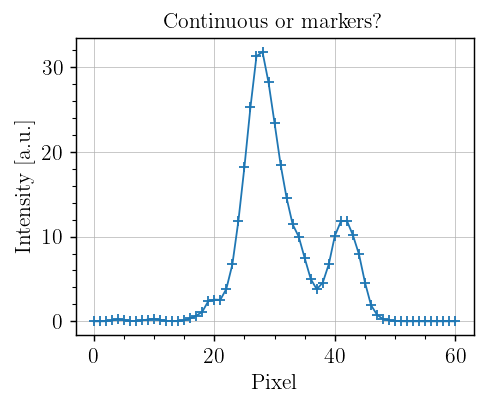

In [3]:
pixel, gray_value = np.loadtxt("../data/microtubules/Acquisition-1/Values_double gaussian.csv", 
                               unpack=True, skiprows=1, delimiter=',')

plt.plot(pixel, gray_value,
         marker='+')
plt.xlabel("Pixel")
plt.ylabel("Intensity [a.u.]")
plt.title("Continuous or markers?")
plt.savefig("../figures/microtubules_width.pdf")